In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
data_path = '../data/'
file_noise = 'gaussian_noise_peppers.png'
file_saltpepper = 'saltandpepper_noise_peppers.png'
file_sharp = 'peppers.png'
file_rice = 'rice.png'

# Q.1 Filtering

## Q.1.1 Denoising

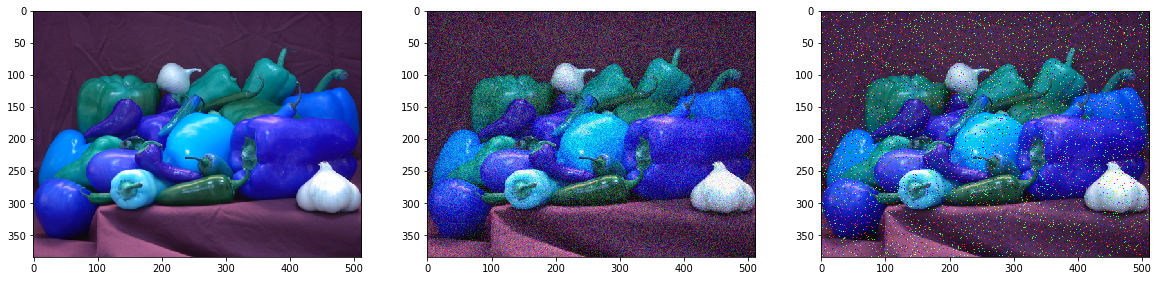

In [18]:
img_noise = cv2.imread(data_path + file_noise)
img_sharp = cv2.imread(data_path + file_sharp)
img_saltpapper = cv2.imread(data_path + file_saltpepper)

fig, ax = plt.subplots(1, 3, figsize=(20,20))
ax[0].imshow(img_sharp);
ax[1].imshow(img_noise);
ax[2].imshow(img_saltpapper);

### Part 1

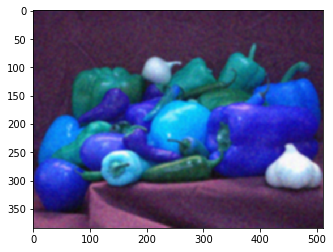

In [4]:
# Gaussian filter
gaussian_filter_img = cv2.GaussianBlur(img_noise, ksize = (7,7), sigmaX = 2)
a = plt.imshow(gaussian_filter_img)

### Part 2

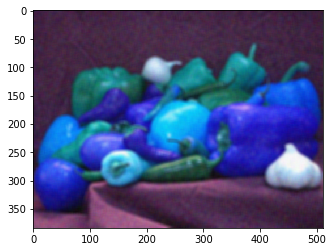

In [5]:
# Box filter
box_filter_img = cv2.blur(img_noise, (7,7))
a = plt.imshow(box_filter_img)

### Part 3

In [6]:
# PSNR
def get_psnr(img_original, img_blur):
    mse = (np.mean(img_original - img_blur) ** 2)
    return 10 * np.log10(255**2/mse)

In [7]:
# PSNR for box filter
print("The PSNR for the box filter is equal to %s." % (get_psnr(img_sharp, box_filter_img)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img)))

The PSNR for the box filter is equal to 6.00087830127.
The PSNR for the gaussian filter is equal to 5.36638585792.


The best filter is the box filter.

### Part 4

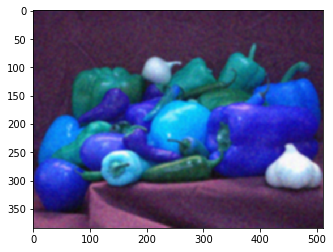

In [8]:
# Gausian filter on salt and papper noise
gaussian_filter_img_saltpepper = cv2.GaussianBlur(img_saltpapper, ksize = (7,7), sigmaX = 2)
a = plt.imshow(gaussian_filter_img)

### Part 5

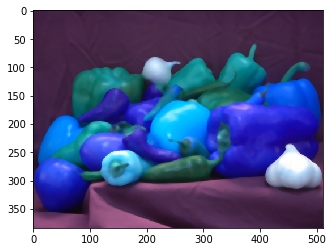

In [9]:
# Median filter on salt and pepper 
median_filter_img_saltpepper = cv2.medianBlur(img_saltpapper,7)
a = plt.imshow(median_filter_img_saltpepper)

### Part 6

In [10]:
# PSNR for box filter
print("The PSNR for the median filter is equal to %s." % (get_psnr(img_sharp, median_filter_img_saltpepper)))
# PSNR for gaussian filter
print("The PSNR for the gaussian filter is equal to %s." % (get_psnr(img_sharp, gaussian_filter_img_saltpepper)))

The PSNR for the median filter is equal to 8.35365538013.
The PSNR for the gaussian filter is equal to 4.22397750537.


The box filter give better results on the salt and pepper image.

## Q.1.2 Sharpening

In [12]:
img_rice = cv2.imread(data_path + file_rice)

### Part 1

In [14]:
def sharpen_img(image, blur):
    return image + (image - blur)

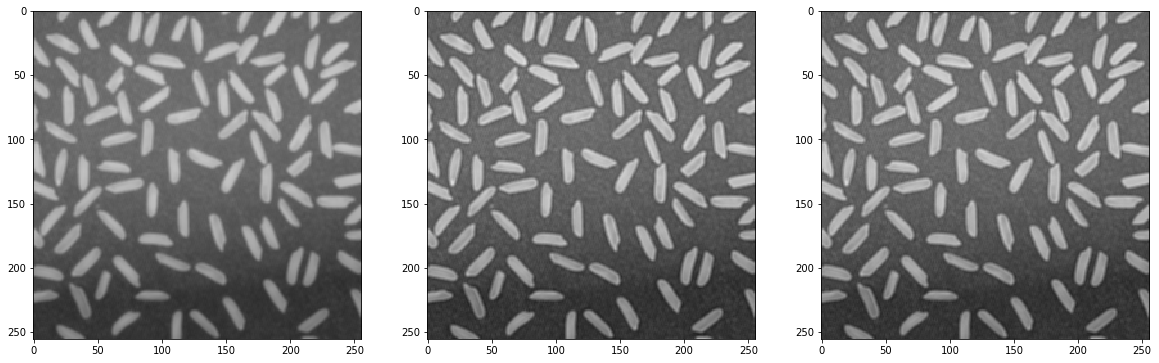

In [21]:
box_filter_img_rice = cv2.blur(img_rice, (5,5))
gaussian_filter_img_rice = cv2.GaussianBlur(img_rice, ksize = (5,5), sigmaX = 2)

sharp_rice_box = sharpen_img(img_rice, box_filter_img_rice)
sharp_rice_gaussian = sharpen_img(img_rice, gaussian_filter_img_rice)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_rice);
ax[1].imshow(sharp_rice_box);
ax[2].imshow(sharp_rice_gaussian);

### Part 2